<a href="https://colab.research.google.com/github/pagliacci0411/Predicci-n-de-precio-de-venta-vivienda/blob/main/Modelo_de_prediccion_vivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Índice de Etapas del Código:***

1. **Importar Librerías:** Se importan las librerías necesarias para el análisis de datos, visualización y modelado.
2. **Importar Datos:** Se importan los datos de los archivos CSV.
3. **Limpiar Datos:** Se realizan tareas de limpieza de datos, como eliminar caracteres extraños, convertir tipos de datos, eliminar columnas con muchos valores faltantes o pocos valores únicos.
4. **EDA (Análisis Exploratorio de Datos):** Se calcula la correlación entre las variables y la variable objetivo ('valor_total_avaluo').
5. **Feature Engineering (Ingeniería de Características):** Se utiliza PyCaret para configurar el entorno de modelado y realizar la ingeniería de características automáticamente.
6. **Comparación de Modelos:** Se comparan diferentes modelos de regresión utilizando PyCaret y se selecciona el mejor modelo basado en MAPE (Mean Absolute Percentage Error).
7. **Ajuste de Hiperparámetros:** Se ajustan los hiperparámetros del modelo seleccionado para mejorar su rendimiento.
8. **Evaluación del Modelo:** Se evalúa el rendimiento del modelo utilizando diferentes métricas y gráficos.
9. **Interpretación del Modelo:** Se intenta interpretar el modelo para entender cómo toma las decisiones.
10. **Predicción:** Se utiliza el modelo para realizar predicciones sobre nuevos datos.
11. **Finalización y Guardado del Modelo:** Se finaliza el modelo y se guarda para su uso posterior.
12. **Ensemble Models (Modelos de Ensamble):** Se exploran técnicas de ensemble como Bagging, Boosting, Blending y Stacking para mejorar el rendimiento del modelo.



# ***Librerias***

## Instalables

In [ ]:
!pip install pycaret # Instalación de la librería PyCaret para AutoML

## Importar

In [ ]:
import pandas as pd # Librería para manipulación de datos
import numpy as np # Librería para cálculos numéricos
import matplotlib.pyplot as plt # Librería para graficar
import seaborn as sns # Librería para graficar (basada en matplotlib)
import plotly.express as px # Librería para graficar interactivos


import pycaret # Librería para AutoML
from pycaret.regression import * # Importa todas las funciones del módulo de regresión de PyCaret

# ***Importar Datos***

In [ ]:
# Importa el archivo CSV de Puntos de Interés
PuintosInteres =pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Prediccion precio de venta casas/PuntosInteres (2).csv', encoding='latin-1', delimiter=';')
# Importa el archivo CSV de entrenamiento con los precios de las viviendas
df = pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Prediccion precio de venta casas/train_precios_vivienda (1).csv', encoding='latin-1')

# ***Limpiar Datos***

In [ ]:
df.head() # Muestra las primeras 5 filas del DataFrame

,Unnamed: 0,id,fecha_aprobaciÃ³n,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,GarantÃÂ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,7401,10570,NaN,OriginaciÃÂ³n,CrÃÂ©dito hipotecario de vivienda,GarantÃÂ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃÂO,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,NaN,OriginaciÃÂ³n,CrÃÂ©dito hipotecario de vivienda,GarantÃÂ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,4170,5967,43091.676139,OriginaciÃÂ³n,CrÃÂ©dito hipotecario de vivienda,GarantÃÂ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,11073,15814,NaN,OriginaciÃÂ³n,CrÃÂ©dito hipotecario de vivienda,GarantÃÂ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


In [ ]:
import re # Importa la librería para expresiones regulares


# Función para limpiar los caracteres extraños
def limpiar_caracteres(texto):
    if isinstance(texto, str):
        return re.sub(r'[^a-zA-Z\s]', '', texto)  # Solo deja letras y espacios
    return texto


# Seleccionar solo las columnas no numéricas
columnas_no_numericas = df.select_dtypes(exclude=['number']).columns
# Aplicar la función a las columnas no numéricas
df[columnas_no_numericas] = df[columnas_no_numericas].applymap(lambda x: limpiar_caracteres(x) if isinstance(x, str) else x)

**Que se hizo en sheets:**
- Dar formato Fecha
- Se elimino nombres de personas en departamento_inmueble
- Se limpiop las variables mal diligenciadas, como: clase_inmueble,uso_actual,ocupante, sometido_a_propiedad_horizontal, aislamiento_posterior...




**Tareas Pendientes:**


- Quitar Columnas :

```
'descripcion_general_sector','perspectivas_de_valorizacion','actualidad_edificadora','comportamiento_oferta_demanda','alcantarillado_en_el_predio','acueducto_en_el_predio','gas_en_el_predio','descripcion_tipo_inmueble','descripcion_uso_inmueble','descripcion_clase_inmueble','altura_permitida','observaciones_altura_permitida','observaciones_aislamiento_posterior','observaciones_aislamiento_lateral','observaciones_antejardin','indice_ocupacion','observaciones_indice_ocupacion','observaciones_indice_construccion','contadores_agua','condicion_ph','numero_piso','numero_de_edificios','area_actividad','uso_principal_ph','rph'
```




- Eliminar columnas con mas de el 50% de los datos esten vaicios
- Quitar los unique que aparezcan muy pocas veces menos de 100
- Las columnas que la mayoría de datos sean números quitar los que son letra
- Quitar las columnas que tengan mas de 10 opciones
- Eliminar caracteres extraños en los nombres de columna

In [ ]:
# Importa la base de datos limpia desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Prediccion precio de venta casas/Base limpia.csv', encoding='latin-1')


In [ ]:
df.valor_total_avaluo # Muestra la columna 'valor_total_avaluo'

,valor_total_avaluo
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
11566,NaN
11567,NaN
11568,NaN
11569,NaN


In [ ]:
import re # Importa la librería para expresiones regulares


# Define una función para limpiar los nombres de las columnas
def clean_column_name(name):
  # Remueve cualquier caracter que no sea letra o espacio
  return re.sub(r'[^a-zA-Z\s]', '', name)


# Aplica la función a todos los nombres de columna
new_column_names = {name: clean_column_name(name) for name in df.columns}
df = df.rename(columns=new_column_names) # Renombra las columnas

In [ ]:
df.select_dtypes(include='object').columns

Index(['fechaaprobacin', 'objeto', 'motivo', 'proposito', 'tipoavaluo',
       'tipocredito', 'tiposubsidio', 'departamentoinmueble',
       'municipioinmueble', 'barrio',
       ...
       'metodovaluacion', 'conceptodelmetodo', 'areaprivada',
       'valorareaprivada', 'valorareagaraje', 'areadeposito',
       'valorareadeposito', 'arealibre', 'valoruvr', 'valoravaluoenuvr'],
      dtype='object', length=187)

In [ ]:
df.select_dtypes(include='object').columns # Selecciona las columnas de tipo 'object'

In [ ]:
# Elimina las columnas duplicadas
df = df.loc[:,~df.columns.duplicated()]


# Identifica las columnas de tipo 'object' con más de 10 valores únicos
object_cols_to_drop = [col for col in df.select_dtypes(include='object') if df[col].nunique() > 10]


# Elimina esas columnas
df = df.drop(columns=object_cols_to_drop)

In [ ]:
# Itera sobre las columnas de tipo 'object'
for col in df.select_dtypes(include='object'):
  # Verifica si más del 50% de los valores pueden ser convertidos a numéricos
  num_like = pd.to_numeric(df[col], errors='coerce').notnull().sum()
  if num_like / len(df) > 0.5:
    # Reemplaza los valores no numéricos con NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Itera sobre las columnas de tipo 'object'
for col in df.select_dtypes(include='object'):
    # Calcula la frecuencia de cada valor
    value_counts = df[col].value_counts()
    # Identifica los valores con frecuencia menor a 100
    rare_values = value_counts[value_counts < 100].index
    # Reemplaza los valores poco frecuentes con NaN
    df[col] = df[col].replace(rare_values, pd.NA)

In [ ]:
# Calcula el porcentaje de valores faltantes para cada columna
missing_percentage = df.isnull().sum() / len(df)


# Identifica las columnas con más del 50% de valores faltantes
cols_to_drop = missing_percentage[missing_percentage > 0.5].index


# Elimina esas columnas
df = df.drop(columns=cols_to_drop)

In [ ]:
df.drop(['Unnamed '],axis = 1, inplace = True) # Elimina la columna 'Unnamed '


df.replace({'Si': 1, 'No': 0}, inplace= True) # Reemplaza 'Si' con 1 y 'No' con 0


df # Muestra el DataFrame

In [ ]:
# Lee el archivo CSV, especificando el separador y la codificación
df_original = pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Prediccion precio de venta casas/train_precios_vivienda (1).csv')


# Reemplaza las comas con puntos en todas las columnas de tipo 'string'
df_original = df_original.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


# Identifica las columnas de tipo 'string' que pueden ser convertidas a numéricas
numeric_candidates = []
for col in df_original.select_dtypes(include='object'):
  try:
    pd.to_numeric(df_original[col], errors='raise')
    numeric_candidates.append(col)
  except:
    pass


# Selecciona las columnas numéricas (originales + convertidas)
numeric_columns = df_original.select_dtypes(include=np.number).columns.tolist() + numeric_candidates


# Crea un DataFrame solo con las columnas numéricas
df_numeric = df_original[numeric_columns].drop(columns = ['Unnamed: 0','fecha_aprobación'])

In [ ]:
# Elimina las columnas donde todos los valores son faltantes
df_numeric = df_numeric.dropna(axis=1, how='all')

In [ ]:
# Calcula la suma de cada columna
column_sums = df_numeric.sum()


# Identifica las columnas donde la suma es cero
zero_sum_columns = column_sums[column_sums == 0].index


# Elimina esas columnas
df_numeric = df_numeric.drop(columns=zero_sum_columns)

In [ ]:
# Itera sobre las columnas en df_numeric
for col in df_numeric.columns:
  if df_numeric[col].dtype == 'object':
    # Intenta convertir la columna a tipo 'float'
    try:
      df_numeric[col] = df_numeric[col].astype(float)
    except ValueError:
      print(f"Could not convert column {col} to float.")


df_numeric # Muestra el DataFrame

In [ ]:
# Combina los dos DataFrames usando un 'left join' en la columna 'id'
df_merged = df.merge(df_numeric, how='left', left_on='id', right_on='id')


# Itera sobre las columnas y combina aquellas que terminan con '_x'
for col in df_merged.columns:
    if col in df.columns and col in df_numeric.columns and col != 'id':
        df_merged[col] = df_merged[col + '_y'].fillna(df_merged[col + '_x'])
        df_merged.drop([col + '_x', col + '_y'], axis=1, inplace=True)


df_merged # Muestra el DataFrame

,id,objeto,proposito,tipoavaluo,tipocredito,alcantarilladoenelsector,acueductoenelsector,gasenelsector,energiaenelsector,telefonoenelsector,...,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr
0,5896,Remate,Garanta Hipotecaria,Remates,Vivienda,1.0,1,1.0,1,1,...,253.40,63350000.0,131.15,81968750.0,0.0,0.0,0.0,145318750.0,2.522304e+06,576134.95
1,10570,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,157.0,78500000.0,0.0,713986654.0,2.572325e+02,2775647.14
2,14600,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,270500000.0,2.594264e+02,1042684.94
3,5967,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,84840000.0,2.522450e+05,336339.67
4,15814,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,104.00,27040000.0,84.52,69306400.0,0.0,0.0,0.0,96346400.0,2.597277e+02,370951.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,17047,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,709028000.0,2.595742e+02,2731504.13
11567,7419,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,2193300.0,158356260.0,2.541828e+02,623001.48
11568,7687,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,572610000.0,2.544109e+02,2250729.04
11569,1247,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,65.61,85293000.0,115.39,97997000.0,0.0,0.0,0.0,183290000.0,2.517095e+06,728214.55


In [ ]:
# Itera sobre las columnas y combina aquellas que terminan con '_x'
for col in df_merged.columns:
  if col.endswith('_x'):
    # Construye el nombre de la columna correspondiente que termina con '_y'
    col_y = col[:-2] + '_y'


    # Verifica si la columna '_y' existe
    if col_y in df_merged.columns:
      # Llena los valores faltantes en la columna '_x' con los valores de la columna '_y'
      df_merged[col] = df_merged[col].fillna(df_merged[col_y])
      # Elimina la columna '_y' ya que es redundante
      df_merged.drop(col_y, axis=1, inplace=True)


# Opcionalmente, renombra las columnas restantes que terminan con '_x' para eliminar el sufijo
df_merged = df_merged.rename(columns={col: col[:-2] for col in df_merged.columns if col.endswith('_x')})


df_merged # Muestra el DataFrame

,id,objeto,proposito,tipoavaluo,tipocredito,alcantarilladoenelsector,acueductoenelsector,gasenelsector,energiaenelsector,telefonoenelsector,...,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr
0,5896,Remate,Garanta Hipotecaria,Remates,Vivienda,1.0,1,1.0,1,1,...,253.40,63350000.0,131.15,81968750.0,0.0,0.0,0.0,145318750.0,2.522304e+06,576134.95
1,10570,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,157.0,78500000.0,0.0,713986654.0,2.572325e+02,2775647.14
2,14600,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,270500000.0,2.594264e+02,1042684.94
3,5967,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,84840000.0,2.522450e+05,336339.67
4,15814,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,104.00,27040000.0,84.52,69306400.0,0.0,0.0,0.0,96346400.0,2.597277e+02,370951.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,17047,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,709028000.0,2.595742e+02,2731504.13
11567,7419,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,2193300.0,158356260.0,2.541828e+02,623001.48
11568,7687,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,572610000.0,2.544109e+02,2250729.04
11569,1247,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,65.61,85293000.0,115.39,97997000.0,0.0,0.0,0.0,183290000.0,2.517095e+06,728214.55


# ***EDA***

In [ ]:
# Calcula las correlaciones con 'valor_total_avaluo'
correlations = df_numeric.corr()['valor_total_avaluo'].sort_values(ascending=False)
# Imprime las correlaciones
print(correlations)

valor_total_avaluo                   1.000000
valor_area_construccion              0.241089
valor_area_libre                     0.121118
valor_area_terreno                   0.059579
Longitud                             0.036800
bodega                               0.036187
valor_uvr                            0.028613
balcon                               0.008728
area_valorada                        0.008402
estudio                              0.006312
bano_servicio                        0.006307
bano_social                          0.005937
zona_de_ropas                        0.004350
cocina                               0.003527
numero_garaje_5                     -0.000060
matricula_inmobiliaria_deposito_4   -0.000268
area_garaje                         -0.000272
zona_verde_privada                  -0.000337
area_terreno                        -0.000446
area_construccion                   -0.000954
area_otros                          -0.001227
oficina                           

# ***Feature engineer y modelado***

In [ ]:
# Configura el entorno de PyCaret para regresión
exp = setup(data = df_merged, target = 'valor_total_avaluo', session_id= 123 )

,Description,Value
0,Session id,123
1,Target,valor_total_avaluo
2,Target type,Regression
3,Original data shape,"(11571, 97)"
4,Transformed data shape,"(11571, 149)"
5,Transformed train set shape,"(8099, 149)"
6,Transformed test set shape,"(3472, 149)"
7,Numeric features,59
8,Categorical features,37
9,Rows with missing values,34.2%


In [ ]:
# Compara diferentes modelos de regresión
exp.compare_models(sort='MAPE' )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,3594680227.2000,8924653685147620605952.0000,67849119769.6000,-62.1528,0.7015,4.7543,1.0390
dt,Decision Tree Regressor,3869264989.7935,15120369682592733069312.0000,85438034807.1289,-6.6423,0.9729,8.8844,1.2110
rf,Random Forest Regressor,4306931643.2944,8709216864594947997696.0000,69271382606.3133,-3192.4693,1.9398,64.3752,24.9710
et,Extra Trees Regressor,3997525661.6321,10047804206740924268544.0000,77163841100.9463,-29.2849,1.9672,915.2514,25.2990
xgboost,Extreme Gradient Boosting,6474933222.4000,18852619984454727761920.0000,106357846425.6000,-116356.8328,2.5043,11762.8733,2.2450
llar,Lasso Least Angle Regression,9343944070.9841,26373715495608622514176.0000,104801677072.3158,-184.0802,3.9022,39000.9012,0.9380
gbr,Gradient Boosting Regressor,4105052532.3706,8800287137485813710848.0000,69253831589.5031,-2630.2455,2.8598,39748.0744,4.6200
ridge,Ridge Regression,10301621462.4096,25614546555157350449152.0000,104575935105.9066,-247.9692,4.0589,40721.6908,1.4780
lasso,Lasso Regression,10310006796.0359,25434472341380859428864.0000,104388303282.6852,-248.5897,4.0598,41005.7601,2.3520
omp,Orthogonal Matching Pursuit,6067749322.5409,22620406416977197793280.0000,94692491872.7326,-79.1263,3.3789,47840.2013,0.9630


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

In [ ]:
# Crea un modelo KNN (K-Nearest Neighbors)
best = exp.create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1548001280.0000,450203181175021764608.0000,21217992704.0000,-1.6825,0.8955,7.1670
1,1786752640.0000,1409703666773095612416.0000,37546020864.0000,0.0472,0.4745,0.2832
2,10304902144.0000,45025210152597407662080.0000,212191444992.0000,-0.0057,1.0744,6.5146
3,2058857728.0000,3354579084465882005504.0000,57918730240.0000,-0.0013,0.4215,0.1378
4,10706865152.0000,32046561106055644839936.0000,179015532544.0000,-0.0625,0.7758,10.7008
5,2562746368.0000,1952669037585439391744.0000,44189016064.0000,-5.8044,0.7031,4.8927
6,2259793664.0000,1799850502492201680896.0000,42424643584.0000,-76.3469,0.6029,7.1640
7,2226463488.0000,1789639856974534279168.0000,42304135168.0000,-219.0195,0.9345,7.7313
8,2201468416.0000,1399900737759193595904.0000,37415247872.0000,0.0233,0.6617,0.9717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Ajusta los hiperparámetros del modelo KNN
tuned_knn = tune_model(best,optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1307419136.0000,401112432308683538432.0000,20027791360.0000,-1.3900,0.8550,5.5155
1,1773959296.0000,1391972009877719482368.0000,37309140992.0000,0.0591,0.4521,0.3273
2,10536633344.0000,45121073774265616039936.0000,212417216512.0000,-0.0078,1.0893,8.1142
3,2059027072.0000,3354589217565043589120.0000,57918816256.0000,-0.0013,0.4271,0.1424
4,11358377984.0000,33142304909793395998720.0000,182050275328.0000,-0.0989,0.7869,13.3454
5,3047450880.0000,2889456603625288630272.0000,53753667584.0000,-9.0688,0.7111,6.0856
6,2267673600.0000,2591148578882405269504.0000,50903326720.0000,-110.3521,0.5572,6.0347
7,2239724288.0000,2582099158381157679104.0000,50814361600.0000,-316.4449,0.9070,6.7535
8,2214084608.0000,1398735431355611480064.0000,37399670784.0000,0.0241,0.6726,1.1772


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Crea un modelo de árbol de decisión
dt = exp.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,555801820.6617,174925554535664418816.0000,13225942481.9430,-0.0423,0.8114,0.3902
1,9512105379.9383,32159610642768920051712.0000,179331008592.4041,-20.7371,0.8907,53.4292
2,9354242059.5358,44854733314188409569280.0000,211789360720.0050,-0.0019,1.0619,0.0109
3,9477444258.6296,44119826796564751319040.0000,210047201353.8023,-12.1692,1.3117,26.4087
4,6428518299.6811,27982083770279188758528.0000,167278461764.4459,0.0722,0.8538,0.0124
5,605678756.1778,287504801263457271808.0000,16955966538.7573,-0.0019,1.0194,0.0152
6,77738061.1802,4340403246355655168.0000,2083363445.5744,0.8135,0.7287,0.0138
7,705770209.2770,295519713796495048704.0000,17190686833.1808,-35.3314,1.0750,7.3247
8,1967361590.5160,1325146083592913027072.0000,36402556003.5681,0.0754,1.3296,1.2244


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Evalúa el modelo KNN
exp.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

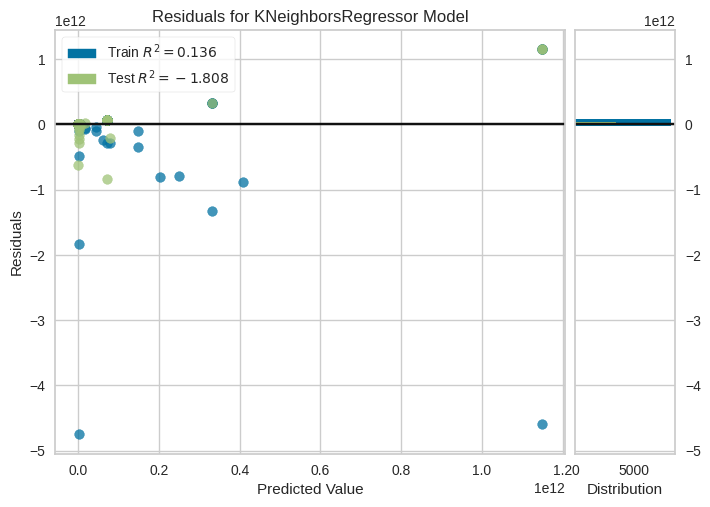

In [ ]:
# Grafica los residuos del modelo KNN
exp.plot_model(best, plot = 'residuals')

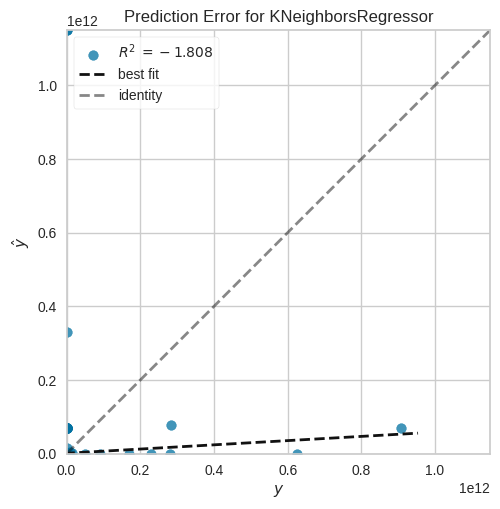

In [ ]:
# Grafica el error del modelo KNN
exp.plot_model(best, plot = 'error')

In [ ]:
# Predice usando el modelo KNN
exp.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,1731746816.0000,1182615707274937630720.0000,34389180416.0000,-1.8082,0.9351,3.5192


,id,objeto,proposito,tipoavaluo,tipocredito,alcantarilladoenelsector,acueductoenelsector,gasenelsector,energiaenelsector,telefonoenelsector,...,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,valor_area_libre,valor_uvr,valor_avaluo_en_uvr,valor_total_avaluo,prediction_label
4952,4717,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,2.521056e+18,7.187845e+05,181209600.0,238995936.0
4424,1111,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,32400000.0,54.000000,38340000.0,0.0,0.0,0.0,2.516860e+05,2.810776e+05,70740000.0,72049920.0
1554,15729,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,21600000.0,68.000000,56008200.0,0.0,0.0,0.0,2.597151e+02,2.988205e+05,77608200.0,78306704.0
5952,11481,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,2.575615e+02,1.145984e+06,295161504.0,293802784.0
3996,7901,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,57344000.0,76.510002,52791900.0,0.0,0.0,0.0,2.546964e+02,4.324203e+05,110135904.0,110107648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,13505,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,14400000.0,54.000000,69660000.0,0.0,0.0,0.0,2.588963e+02,3.246860e+05,84060000.0,84206640.0
4242,12690,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,2.584224e+02,1.636999e+06,422912000.0,421314240.0
5077,16047,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,2.597905e+02,6.231359e+05,161884800.0,161687296.0
2931,10281,Originacin,Garanta Hipotecaria,Hipotecario,Vivienda,1.0,1,1.0,1,1,...,0.0,0.000000,0.0,0.0,0.0,7860000.0,2.571708e+02,4.619688e+05,118804896.0,128665744.0


In [ ]:
# Muestra las columnas 'valor_total_avaluo' y 'prediction_label' de la predicción
exp.predict_model(best)[['valor_total_avaluo','prediction_label']]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,1731746816.0000,1182615707274937630720.0000,34389180416.0000,-1.8082,0.9351,3.5192


,valor_total_avaluo,prediction_label
4952,181209600.0,238995936.0
4424,70740000.0,72049920.0
1554,77608200.0,78306704.0
5952,295161504.0,293802784.0
3996,110135904.0,110107648.0
...,...,...
7665,84060000.0,84206640.0
4242,422912000.0,421314240.0
5077,161884800.0,161687296.0
2931,118804896.0,128665744.0


In [ ]:
# Finaliza el modelo KNN
final_best = finalize_model(best)

In [ ]:
# Guarda el modelo finalizado
exp.save_model(final_best, '/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Prediccion precio de venta casas/pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['id', 'alcantarilladoenelsector',
                                              'gasenelsector',
                                              'telefonoenelsector',
                                              'viaspavimentadas',
                                              'sardinelesenlasvias',
                                              'andenesenlasvias', 'barriolegal',
                                              'alamedas', 'ciclorutas',
                                              'energiaenelpredio',
                                              'telefonoenelpredio',
                                              'sometidoapropiedadhorizontal',
                                              'prediosubdividid...
                                                                     'calidadacabadosmuros',
                                                 

## Ensamble models

In [ ]:
# Crea un modelo ensemble con Bagging usando el modelo de árbol de decisión
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4341441850.1160,3059140624800927449088.0000,55309498504.3340,-17.2276,1.9109,11.2351
1,5513541208.8200,3740285318320879042560.0000,61157872087.9077,-1.5281,1.4916,17.9698
2,10282930480.3473,45206686813730996486144.0000,212618641736.1634,-0.0097,1.6163,7.2755
3,3887402653.4684,4186156996295738785792.0000,64700517743.6451,-0.2495,1.1509,6.3377
4,11870682866.5007,32747869726464830078976.0000,180963724891.1086,-0.0858,1.9394,16.4946
5,2136855721.6168,1227174032744201322496.0000,35031043843.2000,-3.2763,1.5297,12.4014
6,7326162121.4487,4710344518093037895680.0000,68631949688.8514,-201.4226,1.3605,32.2441
7,3059872287.4921,6530265453827131965440.0000,80810057875.4101,-801.8350,1.3855,2084.3817
8,1663125922.4939,1263054732267593400320.0000,35539481316.8059,0.1187,1.5256,1.9063


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [ ]:
# Crea un modelo ensemble con Boosting usando el modelo de árbol de decisión
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,461227828.4543,167866564481861550080.0000,12956332987.4568,-0.0002,1.0254,0.0110
1,1212532976.6617,528296701763572203520.0000,22984705822.8634,0.6429,1.3348,0.0142
2,9356289618.1877,44854691591383712530432.0000,211789262219.2724,-0.0019,1.0434,0.0135
3,2038259100.4395,3354555868544606142464.0000,57918527852.0147,-0.0013,0.7196,0.0099
4,6709375013.3284,28147948176712772091904.0000,167773502606.0813,0.0667,1.3418,0.0138
5,603277347.5901,287484881924980637696.0000,16955379144.2415,-0.0018,1.1801,0.0133
6,177741650.0988,23225194837543501824.0000,4819252518.5493,0.0019,1.2885,0.0141
7,117351566.1601,8081411359569149952.0000,2842782327.1522,0.0065,1.2556,17859.2454
8,1865527042.0963,1317066999807271501824.0000,36291417715.5877,0.0811,1.2321,0.0161


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [ ]:
# Compara modelos y selecciona los 2 mejores basados en MAPE, incluyendo KNN y árbol de decisión
best_MAPE_models_top2 = compare_models(sort = 'MAPE', n_select = 2, include= ['knn', 'dt'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,3594680227.2000,8924653685147620605952.0000,67849119769.6000,-62.1528,0.7015,4.7543,1.6350
dt,Decision Tree Regressor,3869264989.7935,15120369682592733069312.0000,85438034807.1289,-6.6423,0.9729,8.8844,1.3900


Processing:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# Crea un modelo blending con los 2 mejores modelos basados en MAE (no definido en el código)
blend_models(best_mae_models_top2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1050162112.4399,239149668099932717056.0000,15464464688.4376,-0.4249,1.1025,3.7764
1,5585868278.4987,8959869482485371895808.0000,94656587105.6282,-5.0561,0.8872,26.8527
2,9828953950.5025,44897339009818148470784.0000,211889921916.5889,-0.0028,1.3557,3.2611
3,5766962969.3284,13545872901542818873344.0000,116386738512.3529,-3.0433,1.1150,13.2696
4,8566892991.6508,29185797679325152018432.0000,170838513454.4466,0.0323,1.0023,5.3533
5,1580890911.3337,703727970687757844480.0000,26527871582.3143,-1.4523,1.1098,2.4495
6,1167528908.8659,455501415791447506944.0000,21342479138.8313,-18.5747,0.5143,3.5859
7,1464278132.8967,525384896235890933760.0000,22921276060.3744,-63.5912,1.1274,7.5241
8,2083204902.5070,1351514247767646273536.0000,36762946668.7267,0.0570,0.9288,1.0959


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('K Neighbors Regressor',
                             KNeighborsRegressor(n_jobs=-1)),
                            ('Decision Tree Regressor',
                             DecisionTreeRegressor(random_state=123))],
                n_jobs=-1)

In [ ]:
# Crea un modelo stacking con los 2 mejores modelos basados en MAE (no definido en el código)
stack_models(best_mae_models_top2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3073090761.1509,172593696396698222592.0000,13137492013.1926,-0.0284,3.7462,17.0189
1,4423750787.3144,1481262888611482959872.0000,38487178236.5437,-0.0012,3.8029,17.7913
2,10930905291.7221,44832382841621957312512.0000,211736588339.4317,-0.0014,3.1946,11.2370
3,4544946057.6545,3356137856850330648576.0000,57932183256.3760,-0.0018,3.3544,17.5296
4,9907989490.3039,30180513033599632539648.0000,173725395476.8837,-0.0007,3.3945,13.1342
5,3049032825.1323,290471806764300795904.0000,17043233459.7723,-0.0122,3.7206,16.6777
6,2826398715.2070,29171908422581428224.0000,5401102519.1697,-0.2536,3.7254,12025.9826
7,2794661143.0939,74944678828994183168.0000,8657059479.3495,-8.2137,3.5053,1079207.2201
8,4202702246.7063,1378024263230851907584.0000,37121749194.1160,0.0385,3.5597,15.0388


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('K Neighbors Regressor',
                               KNeighborsRegressor(n_jobs=-1)),
                              ('Decision Tree Regressor',
                               DecisionTreeRegressor(random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)